Election projection data from fivethirtyeight.com (source: https://github.com/fivethirtyeight/data/tree/master/house-forecast-2018)

Their data was produced by analyzing polling results on a daily basis to construct a likely share of the vote for each candidate in each Congressional district, for the time period from August up until Election Day.



In [1]:
%matplotlib inline

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


In [2]:
df = pd.read_csv('house_district_forecast.csv')

# What data is in the file?

In [3]:
df.columns

Index(['forecastdate', 'state', 'district', 'special', 'candidate', 'party',
       'incumbent', 'model', 'win_probability', 'voteshare', 'p10_voteshare',
       'p90_voteshare'],
      dtype='object')

# fivethirtyeight.com's projections for Pramila Jayapal's vote percentage each day leading up to the election, starting in August

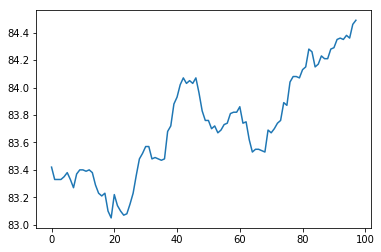

In [4]:
plt.plot(range(98), df.voteshare[np.logical_and(df.candidate=='Pramila Jayapal', df.model=='classic')])

# Everyone named "John" who ran for Congress this year

In [5]:
print(df[df.candidate.str.contains("John ")].candidate.unique())

['John Garamendi' 'John Fitzgerald' 'John Briscoe' 'John B. Larson'
 'John Rutherford' 'John Lewis' 'John D. Elleson' 'John Shimkus'
 'John A. Yarmuth' 'John Hugo' 'John P. Sarbanes' 'John Walsh'
 'John Moolenaar' 'John J. McCann Jr.' 'John R. Muniz' 'John Faso'
 'John Katko' 'John Verbeek' 'John Chrin' 'John Joyce' 'John Rose'
 'John Ratcliffe' 'John Culberson' 'John Carter' 'John R. Curtis']


# Projected average proportion of the vote going to each party on the start of Election Day

In [6]:
print('Republican\t', df.voteshare[np.logical_and(df.forecastdate == '2018-11-06', df.party=='R')].mean())
print('Democrat\t', df.voteshare[np.logical_and(df.forecastdate == '2018-11-06', df.party=='D')].mean())

Republican	 46.184394319131165
Democrat	 54.6767647058824


# All the other parties that had candidates on the ballot

In [7]:
df.party.unique()

array(['R', 'D', nan, 'LIB', 'G', 'I', 'GRE', 'NPA', 'IND',
       'US Taxpayers', 'Working Class', 'Legal Marijuana Now',
       'Independence Party', 'REF', 'CON', 'Reform Party', 'WOF', 'IPO',
       'L', 'AME', 'DPD', 'Mountain', "Women's Equality Party"],
      dtype=object)

# The non-Republican, non-Democrat, who had the highest projected vote percentage on Election Day

In [8]:
df.voteshare[np.logical_and(df.party != 'D', df.party != 'R')].max()

34.46

In [9]:
df[np.logical_and(df.voteshare == 34.46, np.logical_and(df.party != 'R', df.party != 'D'))].candidate.unique()[0]

'Irving Harris'